In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.resnet import ResNet101
import matplotlib.pyplot as plt

In [3]:
train_path = "/content/drive/MyDrive/Colab Notebooks/seg_train/seg_train/"
test_path = "/content/drive/MyDrive/Colab Notebooks/seg_test/seg_test/"

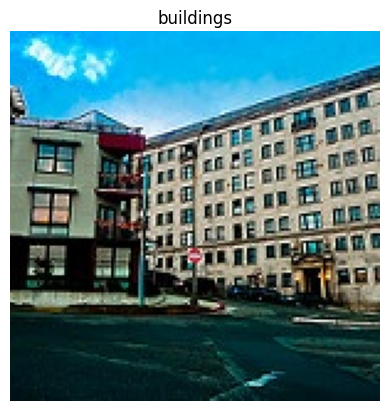

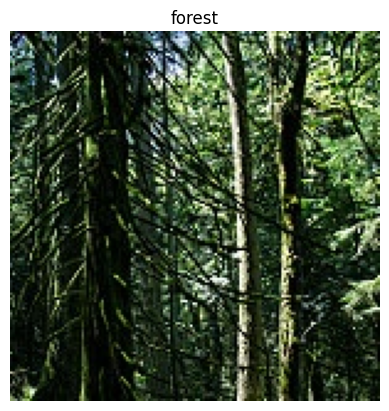

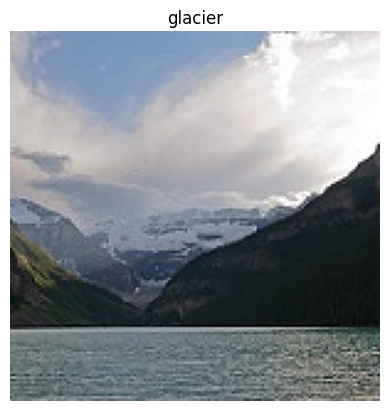

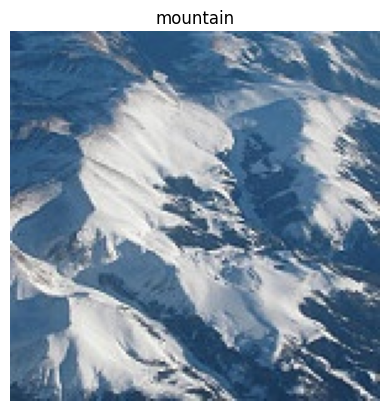

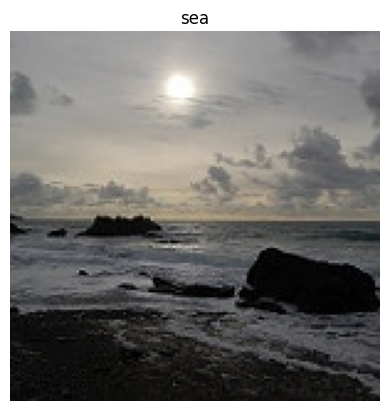

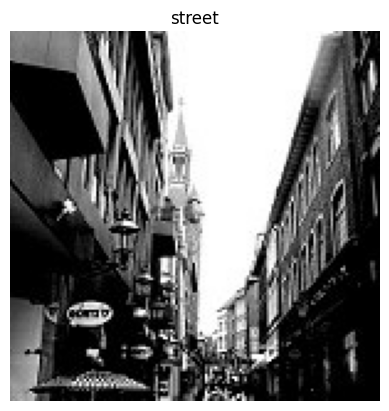

In [4]:
import os
for i in os.listdir(train_path):
  for j in os.listdir(train_path + i):
      img = load_img(train_path + i + "/" + j)
      plt.imshow(img)
      plt.title(i)
      plt.axis("off")
      plt.show()
      break

In [5]:
train_data = ImageDataGenerator(rescale = 1./255)
test_data = ImageDataGenerator(rescale = 1./255)

In [6]:
train_datagen = train_data.flow_from_directory(train_path,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               color_mode = "rgb",
                                               class_mode = "categorical")

Found 14034 images belonging to 6 classes.


In [7]:
test_datagen = test_data.flow_from_directory(test_path,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             color_mode = "rgb",
                                             class_mode = "categorical")

Found 3000 images belonging to 6 classes.


In [8]:
model = ResNet101(weights = "imagenet", include_top = False, input_shape=(224,224,3))

171446536/171446536 [==============================] - 1s 0us/step


In [9]:
from tensorflow.keras import layers, models

In [10]:
flatten_layers = layers.Flatten()
dense_layer1 = layers.Dense(50, activation = "relu")
dense_layer2 = layers.Dense(20, activation = "relu")
prediction_layer = layers.Dense(6, activation = "softmax")

In [11]:
model = models.Sequential([
    model,
    flatten_layers,
    dense_layer1,
    dense_layer2,
    prediction_layer
])

In [12]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(train_datagen, validation_data= test_datagen, epochs = 5, batch_size = 32)